https://assaeunji.github.io/data%20analysis/2021-09-25-arimastock/
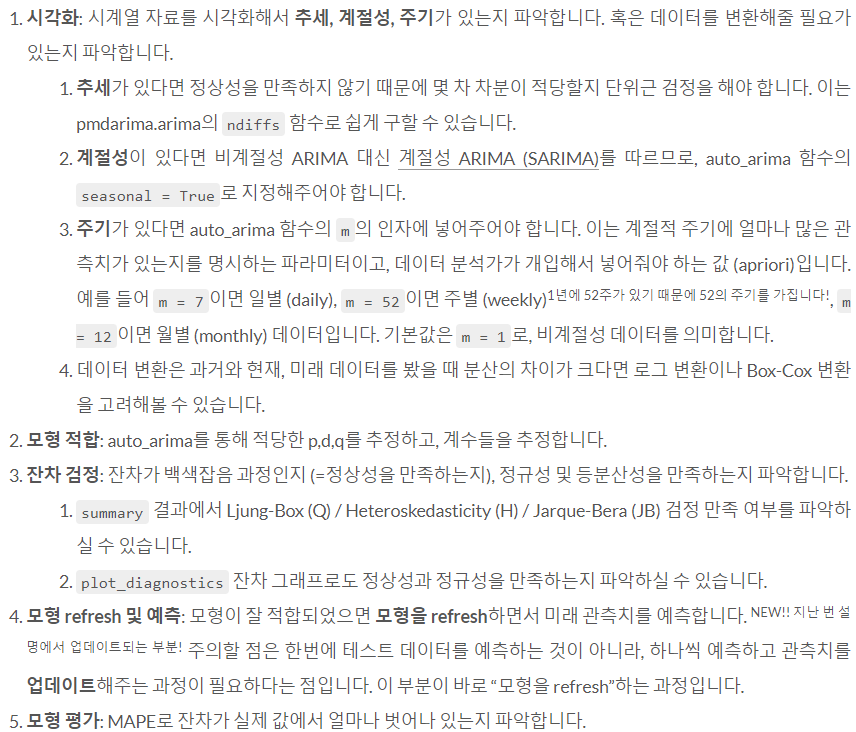

In [1]:
pip install --user pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from pmdarima.arima import ndiffs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [3]:
data = pd.read_csv('data/electricity.csv')
data

,Residential,Commercial,Industrial,Total,dates
0,3078100.0,2016100.0,2425400.0,7770200.0,1990-01-01
1,2660700.0,2032600.0,2664500.0,7620100.0,1990-02-01
2,2319400.0,1870300.0,2478800.0,6905400.0,1990-03-01
3,2173000.0,1882700.0,2541300.0,6835700.0,1990-04-01
4,2028400.0,1901300.0,2540600.0,6714600.0,1990-05-01
...,...,...,...,...,...
310,3079400.0,3464700.0,2545900.0,9110300.0,2015-11-01
311,3581700.0,3429430.0,2449100.0,9480300.0,2015-12-01
312,4219200.0,3559200.0,2460900.0,10260000.0,2016-01-01
313,3997000.0,3563400.0,2561800.0,10145000.0,2016-02-01


In [4]:
df = data[['dates', 'Total']] #dates와 total만 df에 담기

df = df.rename(columns={
    "Total" : "total"
}) # Total 변수이름 변경

df

,dates,total
0,1990-01-01,7770200.0
1,1990-02-01,7620100.0
2,1990-03-01,6905400.0
3,1990-04-01,6835700.0
4,1990-05-01,6714600.0
...,...,...
310,2015-11-01,9110300.0
311,2015-12-01,9480300.0
312,2016-01-01,10260000.0
313,2016-02-01,10145000.0


In [5]:
df.info() #type 및 null 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dates   315 non-null    object 
 1   total   306 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


In [6]:
df[df['total'].isnull()]

,dates,total
26,1992-03-01,NaN
76,1996-05-01,NaN
172,2004-05-01,NaN
175,2004-08-01,NaN
210,2007-07-01,NaN
221,2008-06-01,NaN
256,2011-05-01,NaN
272,2012-09-01,NaN
273,2012-10-01,NaN


In [7]:
df['dates'] = pd.to_datetime(df['dates']) #dates 변수 타입 변경
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dates   315 non-null    datetime64[ns]
 1   total   306 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB


In [8]:
df.set_index('dates',inplace=False)

,total
dates,
1990-01-01,7770200.0
1990-02-01,7620100.0
1990-03-01,6905400.0
1990-04-01,6835700.0
1990-05-01,6714600.0
...,...
2015-11-01,9110300.0
2015-12-01,9480300.0
2016-01-01,10260000.0


<AxesSubplot:>

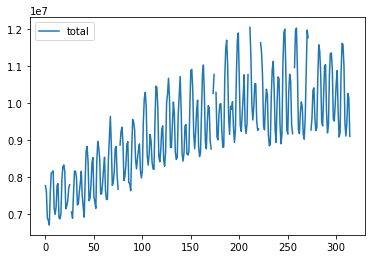

In [9]:
df_all = df[['total']]

df_all.plot()

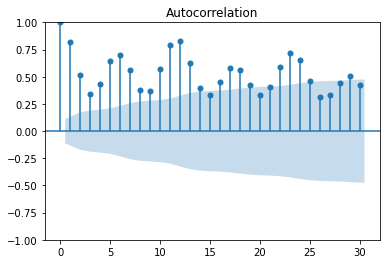

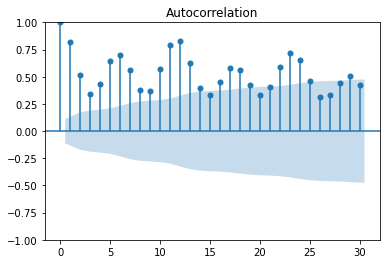

In [10]:
df_all_null = df_all.dropna(axis=0) # NAN때문에 plot이 안된다. 
# df_all_null.info()
plot_acf(df_all_null['total'], lags=30, alpha=0.05)

In [11]:
df['year'] = df['dates'].dt.year # dates 파생변수 year 생성
df

,dates,total,year
0,1990-01-01,7770200.0,1990
1,1990-02-01,7620100.0,1990
2,1990-03-01,6905400.0,1990
3,1990-04-01,6835700.0,1990
4,1990-05-01,6714600.0,1990
...,...,...,...
310,2015-11-01,9110300.0,2015
311,2015-12-01,9480300.0,2015
312,2016-01-01,10260000.0,2016
313,2016-02-01,10145000.0,2016


In [12]:
df9703 = df.query('year >= 1997 & year <= 2003') # 1997-2003 데이터 추출
df9703

,dates,total,year
84,1997-01-01,8882200.0,1997
85,1997-02-01,8959500.0,1997
86,1997-03-01,7854700.0,1997
87,1997-04-01,7826900.0,1997
88,1997-05-01,7636900.0,1997
...,...,...,...
163,2003-08-01,11026000.0,2003
164,2003-09-01,10220000.0,2003
165,2003-10-01,8947700.0,2003
166,2003-11-01,8765900.0,2003


In [13]:
df9703 = df9703[['total']]
df9703

,total
84,8882200.0
85,8959500.0
86,7854700.0
87,7826900.0
88,7636900.0
...,...
163,11026000.0
164,10220000.0
165,8947700.0
166,8765900.0


<AxesSubplot:>

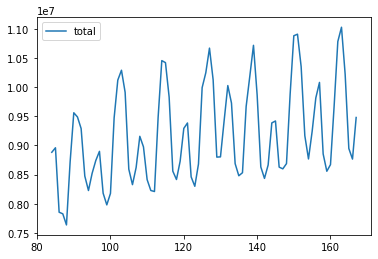

In [14]:
df9703.plot()

In [15]:
df9703.describe()

,total
count,8.400000e+01
mean,9.192832e+06
std,8.231750e+05
min,7.636900e+06
25%,8.584125e+06
50%,8.953600e+06
75%,9.837350e+06
max,1.102600e+07


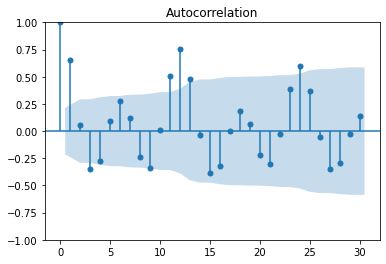

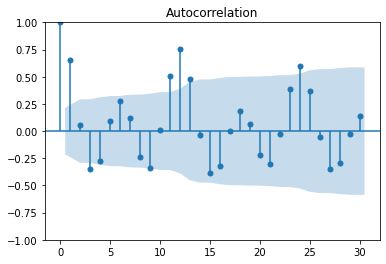

In [16]:
plot_acf(df9703['total'], lags=30, alpha=0.05)

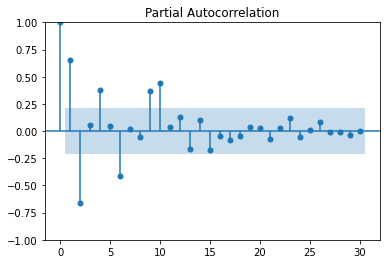

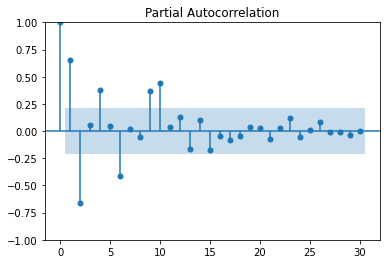

In [17]:
plot_pacf(df9703['total'], lags=30, alpha=0.05, method='ywm')

In [18]:
def adf_test(x):
    stat, p_value, lags, nobs, crit, icb = adfuller(x)
    
    return p_value

print('pvalue =', adf_test(df9703))

pvalue = 0.26996723464907924


In [19]:
kpss_diffs = ndiffs(df9703, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(df9703, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f" d = {n_diffs}")

 d = 1


In [34]:
'''df9703_arima = auto_arima(y = df9703        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 12      
                      , seasonal = True # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True      # stepwise로 모델을 적합할 때마다 결과를 프린트
                      )'''

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1972.152, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1972.774, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1971.707, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1971.467, Time=0.17 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1973.270, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1972.479, Time=0.25 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1972.943, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1971.621, Time=0.14 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1974.439, Time=0.57 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1970.385, Time=0.08 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1971.428, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1971.202, Time=0.12 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1972.955, Time=0.43 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1971.557, Time=0.10 sec
 ARIMA(1,1,1)(0,1,1

In [51]:
model = auto_arima(df9703, d = n_diffs, m=12, seasonal = True, trace = True)
model.fit(df9703)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1972.153, Time=0.61 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1972.774, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1971.707, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1971.467, Time=0.16 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1973.270, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1972.479, Time=0.28 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1972.943, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1971.621, Time=0.16 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1974.439, Time=0.62 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1970.385, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1972.152, Time=0.22 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1971.428, Time=0.17 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1971.202, Time=0.12 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1972.955, Time=0.44 sec
 ARIMA(1,1,0)(0,1,1

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [53]:
print(model.summary())
#정상화 및 정규성 확인1

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   84
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -983.192
Date:                              Mon, 06 Feb 2023   AIC                           1970.385
Time:                                      13:16:39   BIC                           1974.910
Sample:                                           0   HQIC                          1972.184
                                               - 84                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.0585      0.037     -1.566      0.117      -0.132       0.015
sigma2      5.526e+

https://assaeunji.github.io/data%20analysis/2021-09-25-arimastock/

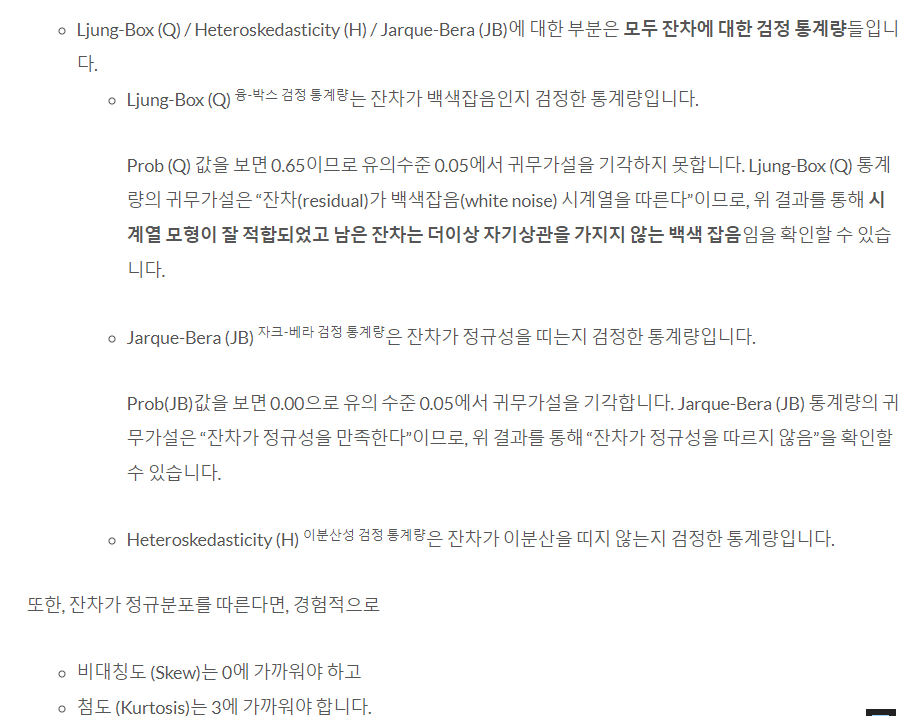

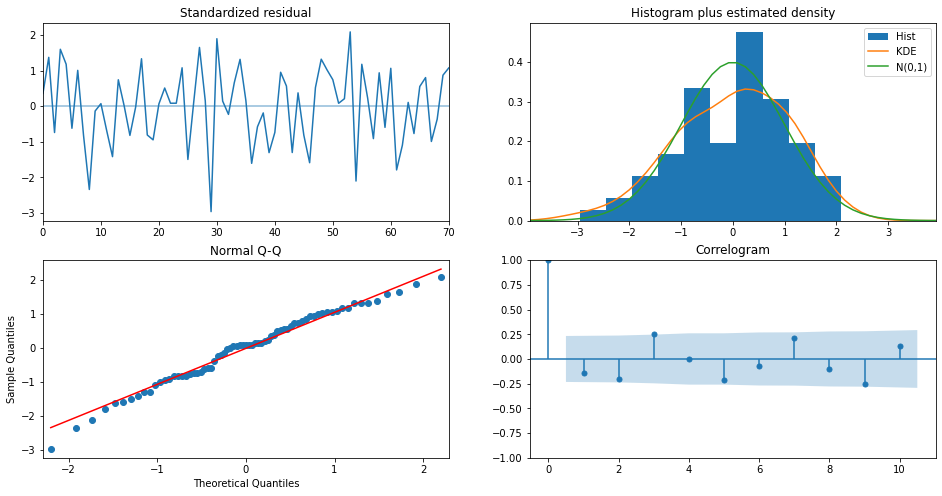

In [54]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

# 잔차가 백색 잡음을 따르는지 : Standardized residual과 Correlogram
# 잔차가 정규성을 만족하는지 : Histogram plus estimated density와 Normal Q-Q

# Standardized residual은 잔차를 그냥 시계열로 그린 것
# Correlogram은 잔차에 대한 ACF
# Histogram plus estimated density는 잔차의 히스토그램을 그려 정규 분포 N(0,1)과 밀도를 추정한 그래프
# Normal Q-Q그래프는 Q-Q 플랏으로 정규성을 만족한다면 빨간 일직선 위에 점들이 분포

## --> 정규성을 만족하지 않는다. 

In [45]:
df9703_fit = df9703_arima.fit(df9703)
print(df9703_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   84
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -983.192
Date:                              Mon, 06 Feb 2023   AIC                           1970.385
Time:                                      13:10:42   BIC                           1974.910
Sample:                                           0   HQIC                          1972.184
                                               - 84                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.0585      0.037     -1.566      0.117      -0.132       0.015
sigma2      5.526e+

C:\Users\mirae\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


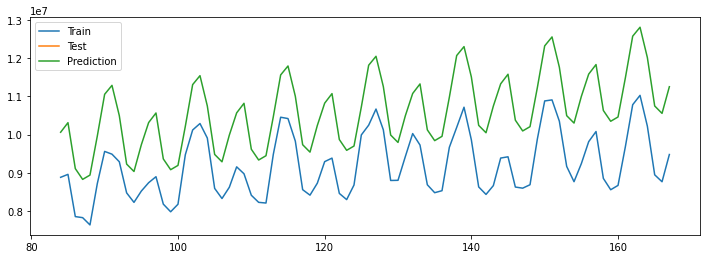

In [62]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=int(0.3*len(data))) 
y_predict = pd.DataFrame(y_predict,index = df9703.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(df9703[:int(0.3*len(data))], label='Train')        # 훈련 데이터
plt.plot(df9703[int(0.7*len(data)):], label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()